In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import time

In [54]:
base_url = "https://collections.louvre.fr/search/export?location%5B0%5D=141080&export-limit=5000&export-offset="

df_list = []
for page in range(0,32794 ,5000 ):
        print(page)
        url = base_url + str(page)
        r = requests.get(url)
        content = r.content.decode("utf-8")
        df = pd.read_csv(StringIO(content),sep=";")
        df_list.append(df)

        time.sleep(1)
df = pd.concat(df_list).reset_index(drop=True).drop_duplicates()
df.to_csv("full_louvre.csv", index=False)
df

0
5000
10000
15000
20000
25000
30000


,ARK,Dénomination / Titre,Auteur,Date de création,Numéro d’inventaire,Collection,Références géographiques / Lieux,Localisation,MNR
0,cl010001741,Etiquette de jarre de Den,NaN,-3100 / -2900 (Den),E 25268,Département des Antiquités égyptiennes,Lieu de découverte : tombe de Den,"Sully, [AE] Salle 634 - L'époque thinite, Gale...",NaN
1,cl010002171,ostracon,NaN,-1126 / -1108 (?) (Ramsès IX),E 11178 A,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 335 - L'écriture et les scri...",NaN
2,cl010002206,papyrus magique,NaN,-1295 / -1069 (?) (époque ramesside [?]),E 6848 A,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 317 - Les dieux et la magie,...",NaN
3,cl010002247,étiquette de jarre à vin,NaN,-1279 / -1213 (Ramsès II),E 7742 1; R 1820,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 332 - Élevage, chasse et pêc...",NaN
4,cl010002250,ostracon,NaN,NaN,E 3260; E 3261; Anastasi n°1088; Anastasi n°1089,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 335 - L'écriture et les scri...",NaN
...,...,...,...,...,...,...,...,...,...
32789,cl010515681,Figure d'applique : saint Pierre,NaN,vers 1230,RFML.OA.2023.35.1,"Département des Objets d'art du Moyen Age, de ...",Lieu de création : Limoges / Lieu de provenanc...,"Richelieu, [OArt] Salle 503 - Jeanne d'Evreux",NaN
32790,cl010521781,Tabatière ovale,"Beaulieu, Pierre-François-Mathis de",1775 / 1776 (3e quart du XVIIIe siècle),RFML.OA.2024.19.1,"Département des Objets d'art du Moyen Age, de ...",Lieu de création : Paris,"Sully, [OArt] Salle 625 - Aline Guerrand-Hermè...",NaN
32791,cl010522399,brique décorative,NaN,-604 / -539 (Néo-babylonien),KLL 45,Département des Antiquités orientales,Lieu de découverte : Hillah,"Richelieu, [AO] Salle 230 - Mésopotamie - Syri...",NaN
32792,cl010522541,colonne papyriforme fasciculée ; modèle,NaN,-664 / -332 (Basse Époque),E 11077 B,Département des Antiquités égyptiennes,Lieu de découverte : Karnak,"Sully, [AE] Salle 334 - Matériaux et technique...",NaN


In [2]:
df = pd.read_csv("full_louvre.csv")
raw_dates = df["Date de création"].str.replace("-"," -").str.extractall("([-0-9]+)")[0]
dates = raw_dates[raw_dates != "-"].loc[:,[0,1]].astype("float64").groupby(level=0).apply(list)


def get_date(x):
    try:
        x = list(dict.fromkeys(x))
        if len(x) == 1:
            return(x[0])
        else:
            return(np.random.randint(min(x),max(x)))
    except Exception as e:
        print(e, " : ", x)
df["date"] = dates.apply(get_date)


In [3]:
new_label = {
"Département des Antiquités grecques, étrusques et romaines" : "Greek and Roman",
"Département des Objets d'art du Moyen Age, de la Renaissance et des temps modernes" : "Middle Age to Modern",
"Département des Antiquités orientales" : "Ancient East",
"Département des Antiquités égyptiennes" : "Egypt",
"Département des Peintures" : "Middle Age to Modern",
"Département des Arts de l'Islam" : "Islam",
"Département des Sculptures du Moyen Age, de la Renaissance et des temps modernes" : "Middle Age to Modern",
"Sculptures des jardins" : "Middle Age to Modern",
"Service de l'Histoire du Louvre" : "history",
"Département des Arts de Byzance et des Chrétientés en Orient" : "Byzantin"
}
df["Department"]  = df["Collection"].replace(new_label)

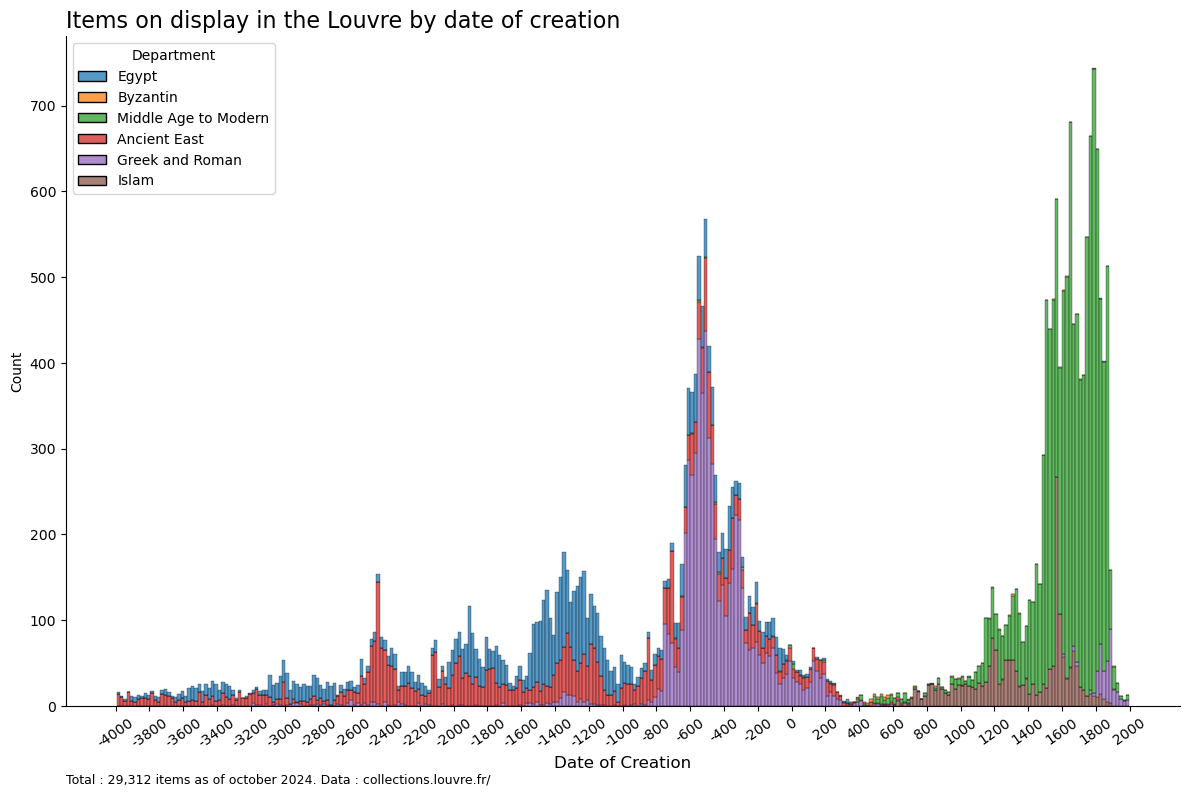

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
debut = -4000
fin = 2000
bins = int((fin-debut)/20)

data = df[(df["date"] > debut) & (df["date"] < fin) & (~df["Department"].isin(["history"]))]

fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data,x="date",bins=bins,ax=ax, hue = "Department",multiple="stack")
sns.despine()
ax.set_xticks(range(debut,fin + 1, 200))
ax.set_xticklabels(ax.get_xticks(), rotation = 35)
ax.set_title("Items on display in the Louvre by date of creation", loc="left",fontsize=16)
ax.set_xlabel("Date of Creation", fontsize=12)

ax.text(min(data["date"]) - 300,- 90,"Total : 29,312 items as of october 2024. Data : collections.louvre.fr/", fontsize=9)

plt.tight_layout()
fig.savefig("items_louvre.png",dpi=150, facecolor="w")

In [7]:
df

,ARK,Dénomination / Titre,Auteur,Date de création,Numéro d’inventaire,Collection,Références géographiques / Lieux,Localisation,MNR,date,Department
0,cl010001741,Etiquette de jarre de Den,NaN,-3100 / -2900 (Den),E 25268,Département des Antiquités égyptiennes,Lieu de découverte : tombe de Den,"Sully, [AE] Salle 634 - L'époque thinite, Gale...",NaN,-3035.0,Egypt
1,cl010002171,ostracon,NaN,-1126 / -1108 (?) (Ramsès IX),E 11178 A,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 335 - L'écriture et les scri...",NaN,-1111.0,Egypt
2,cl010002206,papyrus magique,NaN,-1295 / -1069 (?) (époque ramesside [?]),E 6848 A,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 317 - Les dieux et la magie,...",NaN,-1239.0,Egypt
3,cl010002247,étiquette de jarre à vin,NaN,-1279 / -1213 (Ramsès II),E 7742 1; R 1820,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 332 - Élevage, chasse et pêc...",NaN,-1232.0,Egypt
4,cl010002250,ostracon,NaN,NaN,E 3260; E 3261; Anastasi n°1088; Anastasi n°1089,Département des Antiquités égyptiennes,NaN,"Sully, [AE] Salle 335 - L'écriture et les scri...",NaN,NaN,Egypt
...,...,...,...,...,...,...,...,...,...,...,...
32789,cl010515681,Figure d'applique : saint Pierre,NaN,vers 1230,RFML.OA.2023.35.1,"Département des Objets d'art du Moyen Age, de ...",Lieu de création : Limoges / Lieu de provenanc...,"Richelieu, [OArt] Salle 503 - Jeanne d'Evreux",NaN,1230.0,Middle Age to Modern
32790,cl010521781,Tabatière ovale,"Beaulieu, Pierre-François-Mathis de",1775 / 1776 (3e quart du XVIIIe siècle),RFML.OA.2024.19.1,"Département des Objets d'art du Moyen Age, de ...",Lieu de création : Paris,"Sully, [OArt] Salle 625 - Aline Guerrand-Hermè...",NaN,1775.0,Middle Age to Modern
32791,cl010522399,brique décorative,NaN,-604 / -539 (Néo-babylonien),KLL 45,Département des Antiquités orientales,Lieu de découverte : Hillah,"Richelieu, [AO] Salle 230 - Mésopotamie - Syri...",NaN,-574.0,Ancient East
32792,cl010522541,colonne papyriforme fasciculée ; modèle,NaN,-664 / -332 (Basse Époque),E 11077 B,Département des Antiquités égyptiennes,Lieu de découverte : Karnak,"Sully, [AE] Salle 334 - Matériaux et technique...",NaN,-602.0,Egypt
